In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
df1 = pd.read_csv('/home/bernard/Desktop/IIT_Thesis/ERO-SNN/quantitative_results/statistics_summary.csv')
df2 = pd.read_csv('/home/bernard/Desktop/IIT_Thesis/ERO-SNN/quantitative_results_binarized/statistics_summary_binarized.csv')

# Replace 'EROSb' with 'EROS' in the 'Column' field
df2['Column'] = df2['Column'].replace('EROSb-SCM', 'EROS-SCM')
df2['Column'] = df2['Column'].replace('Input-EROSb', 'Input-EROS')

# Merge the DataFrames on common columns using an outer join
merged_df = pd.merge(df1, df2, on=['Dataset', 'Neighbors', 'Score Type', 'Column'], suffixes=('_original', '_binarized'), how='outer')

# Calculate differences or ratios for comparison
merged_df['Mean_diff'] = merged_df['Mean_binarized'] - merged_df['Mean_original']
merged_df['Std_Dev_diff'] = merged_df['Std Dev_binarized'] - merged_df['Std Dev_original']
merged_df['Min_diff'] = merged_df['Min_binarized'] - merged_df['Min_original']
merged_df['Max_diff'] = merged_df['Max_binarized'] - merged_df['Max_original']

# Determine which value is higher
merged_df['Mean_higher'] = merged_df.apply(lambda row: 'binarized' if row['Mean_binarized'] > row['Mean_original'] else 'original', axis=1)
merged_df['Std_Dev_higher'] = merged_df.apply(lambda row: 'binarized' if row['Std Dev_binarized'] > row['Std Dev_original'] else 'original', axis=1)
merged_df['Min_higher'] = merged_df.apply(lambda row: 'binarized' if row['Min_binarized'] > row['Min_original'] else 'original', axis=1)
merged_df['Max_higher'] = merged_df.apply(lambda row: 'binarized' if row['Max_binarized'] > row['Max_original'] else 'original', axis=1)

# Output the comparison results
display(merged_df[['Dataset', 'Neighbors', 'Score Type', 'Column', 'Mean_diff', 'Mean_higher', 'Std_Dev_diff', 'Std_Dev_higher', 'Min_diff', 'Min_higher', 'Max_diff', 'Max_higher']])

,Dataset,Neighbors,Score Type,Column,Mean_diff,Mean_higher,Std_Dev_diff,Std_Dev_higher,Min_diff,Min_higher,Max_diff,Max_higher
0,EyeTracking,4,nmi,EROS-SCM,0.006594,binarized,0.005375,binarized,0.000000,original,0.076996,binarized
1,EyeTracking,4,nmi,Input-EROS,0.001756,binarized,0.007504,binarized,0.000000,original,0.301028,binarized
2,EyeTracking,4,nmi,Input-SCM,0.000000,original,0.000000,original,0.000000,original,0.000000,original
3,EyeTracking,4,ssim,EROS-SCM,0.062947,binarized,0.001664,binarized,0.043112,binarized,0.000000,original
4,EyeTracking,4,ssim,Input-EROS,0.074907,binarized,0.002143,binarized,0.051769,binarized,0.000000,original
...,...,...,...,...,...,...,...,...,...,...,...,...
67,h36m,20,nmi,Input-EROS,-0.001348,original,-0.000658,original,0.000000,original,-0.003435,original
68,h36m,20,nmi,Input-SCM,0.000000,original,0.000000,original,0.000000,original,0.000000,original
69,h36m,20,ssim,EROS-SCM,0.016309,binarized,-0.003046,original,0.013153,binarized,0.000000,original
70,h36m,20,ssim,Input-EROS,0.016515,binarized,-0.000958,original,0.012018,binarized,0.000000,original


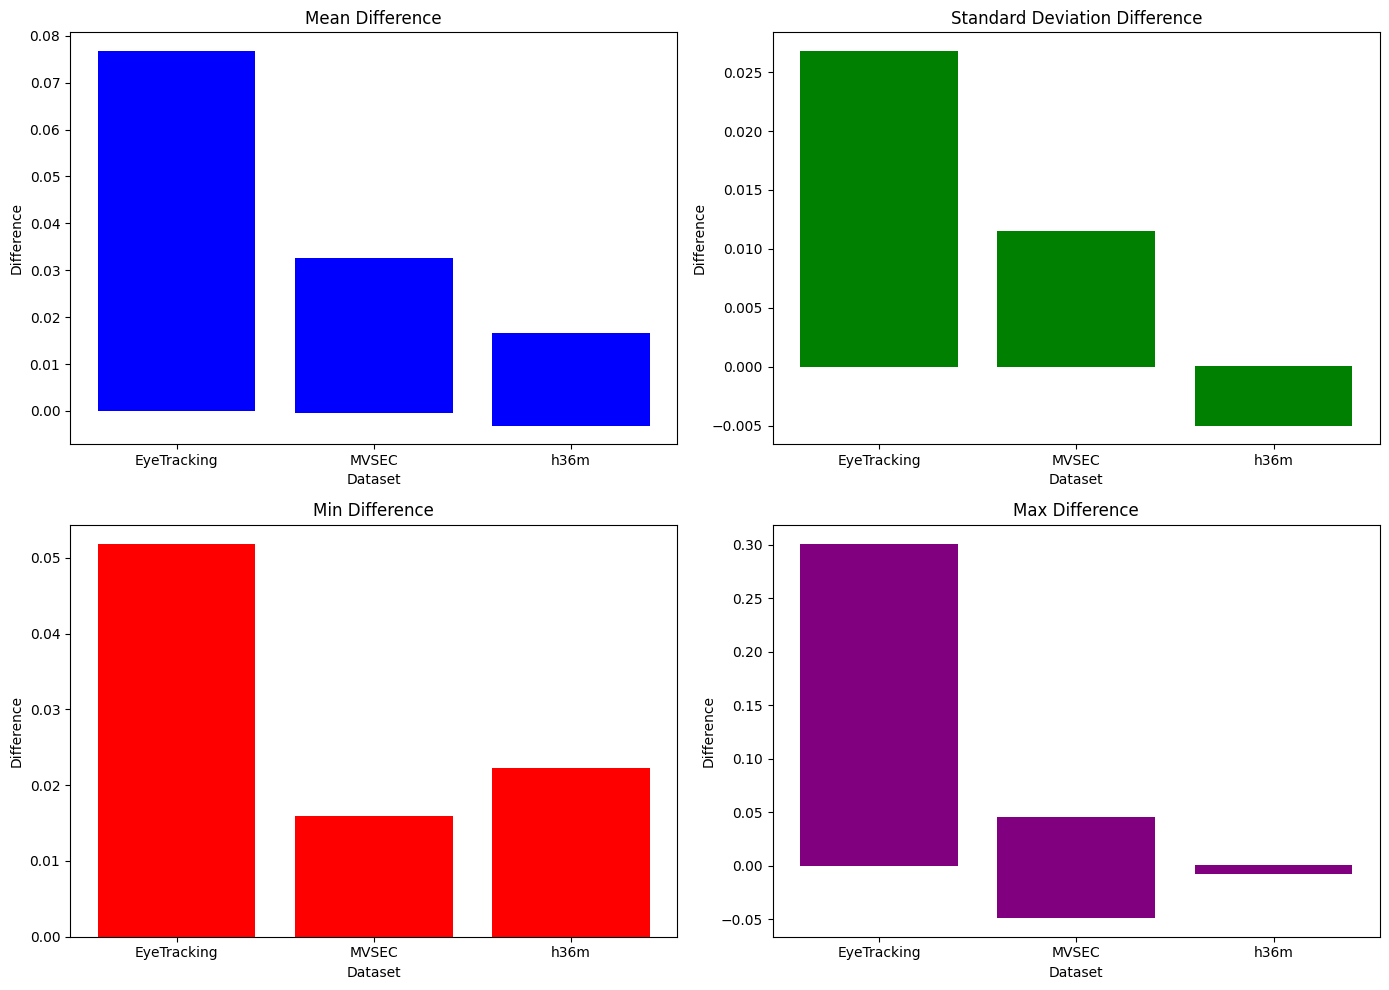

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Mean difference plot
axes[0, 0].bar(merged_df['Dataset'], merged_df['Mean_diff'], color='blue')
axes[0, 0].set_title('Mean Difference')
axes[0, 0].set_xlabel('Dataset')
axes[0, 0].set_ylabel('Difference')

# Std Dev difference plot
axes[0, 1].bar(merged_df['Dataset'], merged_df['Std_Dev_diff'], color='green')
axes[0, 1].set_title('Standard Deviation Difference')
axes[0, 1].set_xlabel('Dataset')
axes[0, 1].set_ylabel('Difference')

# Min difference plot
axes[1, 0].bar(merged_df['Dataset'], merged_df['Min_diff'], color='red')
axes[1, 0].set_title('Min Difference')
axes[1, 0].set_xlabel('Dataset')
axes[1, 0].set_ylabel('Difference')

# Max difference plot
axes[1, 1].bar(merged_df['Dataset'], merged_df['Max_diff'], color='purple')
axes[1, 1].set_title('Max Difference')
axes[1, 1].set_xlabel('Dataset')
axes[1, 1].set_ylabel('Difference')

plt.tight_layout()
plt.show()